<a href="https://colab.research.google.com/github/PedroMarcusso09/Calculadora-de-Aluguel-/blob/main/Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa: Calculadora de Aluguel - Machine Learning

In [268]:
import pandas as pd

In [269]:
import pandas as pd
df = pd.read_csv('/content/dados_tratados_ml (1).csv')
df.head()

,zonas,precos,area,quarto
0,norte,1200,58.0,2.0
1,norte,3100,186.0,3.0
2,norte,3300,80.0,3.0
3,norte,1550,50.0,2.0
4,norte,1200,56.0,2.0


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zonas   960 non-null    object 
 1   precos  960 non-null    int64  
 2   area    960 non-null    float64
 3   quarto  960 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.1+ KB


In [271]:
# Análise Estatistica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precos,960.0,9238.151042,126386.630621,500.0,1600.0,2400.0,3900.0,3750000.0
area,960.0,80.179167,56.911665,20.0,49.0,62.0,86.0,500.0
quarto,960.0,2.100000,0.849707,0.0,2.0,2.0,3.0,5.0


# Separar treino e teste

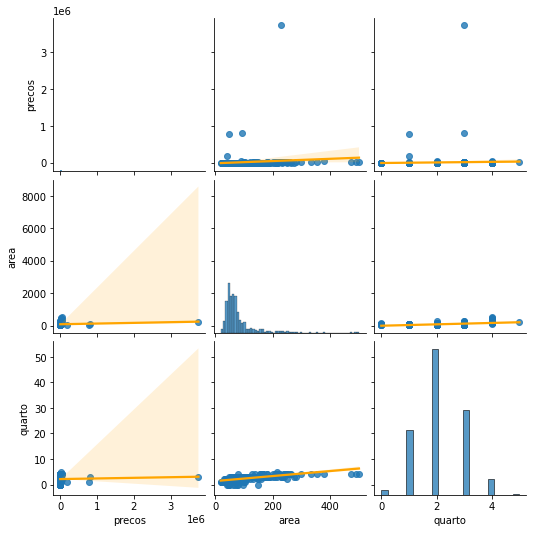

In [272]:
import seaborn as sns
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30, random_state=42, stratify=df['zonas'])
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

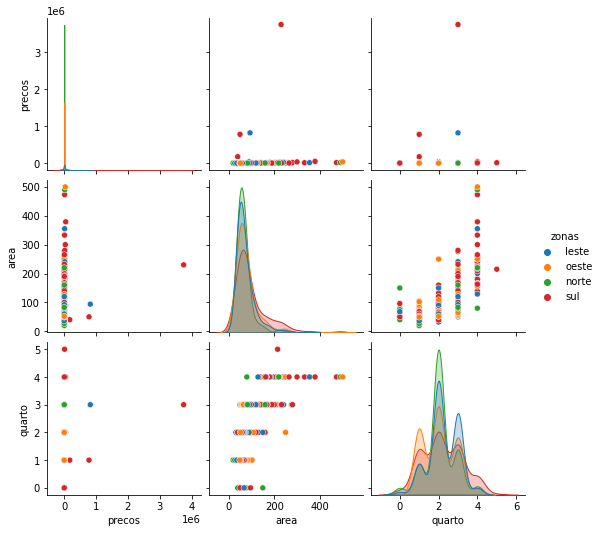

In [273]:
sns.pairplot(train, hue='zonas')

# Tratamento com LOG

In [274]:
import numpy as np

In [275]:
train['precos']=train['precos'].apply(np.log1p)
train['area']=train['area'].apply(np.log1p)

In [276]:
test['precos']=test['precos'].apply(np.log1p)
test['area']=test['area'].apply(np.log1p)

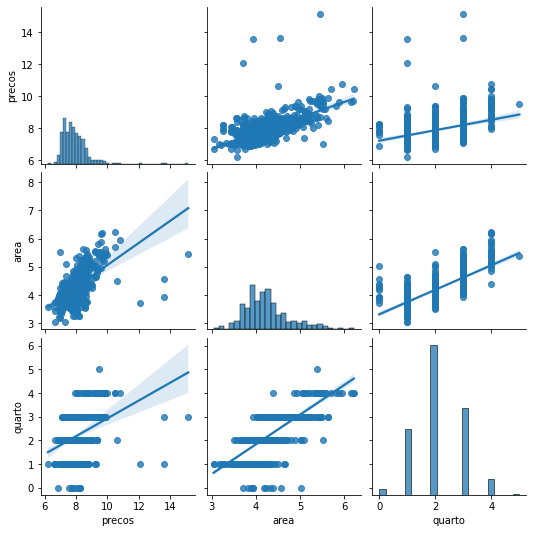

In [277]:
sns.pairplot(train, kind='reg')

# Tratamento de colunas

In [278]:
# Colunas numéricas
X_cols = ['zonas', 'area', 'quarto']
y_col = ['precos']

In [279]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

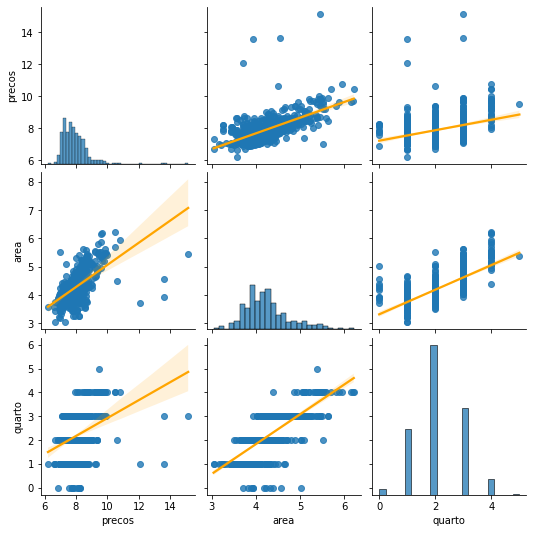

In [280]:
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

In [281]:
# Colunas categóricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

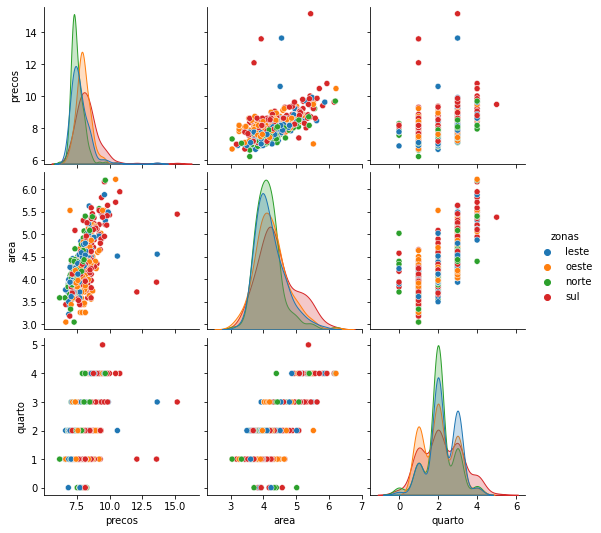

In [282]:
sns.pairplot(train, hue='zonas')

In [283]:
train.to_csv('treino_preprocessado.csv', index=False)
test.to_csv('teste_preprocessado.csv', index=False)

# Modelo Baseline (Machine Learning)

In [284]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6439373543717175

In [285]:
from sklearn.dummy import DummyRegressor
reg = DummyRegressor(strategy='mean')
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-0.0009476470039584406

# Outros modelos de Machine Learning

In [286]:
from sklearn.linear_model import RidgeCV, Lasso, ElasticNet, LassoLars, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [287]:
reg_list = [RidgeCV(),
            LGBMRegressor(), 
            XGBRegressor(objective='reg:squarederror'),
            SVR(),
            KNeighborsRegressor(),
            RandomForestRegressor(),
            AdaBoostRegressor(),
            GradientBoostingRegressor(),
            MLPRegressor()
            ]

In [288]:
from sklearn.model_selection import cross_val_score
import numpy as np

for reg in reg_list:
    print(f'Treinando Modelo {reg.__class__.__name__}')
    reg.fit(X_train, y_train)
    
    train_score = reg.score(X_train, y_train)
    cv_scores = cross_val_score(reg, X_train, y_train)
    test_score = reg.score(X_test, y_test)
    
    print(f"R2 Score Train: {train_score}")
    print(f"R2 Score Valid: {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}")
    print(f"R2 Score Test: {test_score}")
    print('='*80)

Treinando Modelo RidgeCV
R2 Score Train: 0.4683559269862264
R2 Score Valid: 0.45 +- 0.08
R2 Score Test: 0.6441341261009902
Treinando Modelo LGBMRegressor
R2 Score Train: 0.6388897154808753
R2 Score Valid: 0.44 +- 0.08
R2 Score Test: 0.6155678152548251
Treinando Modelo XGBRegressor
R2 Score Train: 0.6842169888310498
R2 Score Valid: 0.44 +- 0.05
R2 Score Test: 0.6469699590248394
Treinando Modelo SVR


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

R2 Score Train: 0.4939058285657638
R2 Score Valid: 0.48 +- 0.08
R2 Score Test: 0.6552652485683044
Treinando Modelo KNeighborsRegressor
R2 Score Train: 0.5994127162552582
R2 Score Valid: 0.38 +- 0.05
R2 Score Test: 0.5951308843322778
Treinando Modelo RandomForestRegressor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

R2 Score Train: 0.8442291121124386
R2 Score Valid: 0.34 +- 0.05
R2 Score Test: 0.5392295855777637
Treinando Modelo AdaBoostRegressor
R2 Score Train: 0.5185386515539268
R2 Score Valid: 0.25 +- 0.05
R2 Score Test: 0.44108525664614595
Treinando Modelo GradientBoostingRegressor


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

R2 Score Train: 0.7156058375072958
R2 Score Valid: 0.43 +- 0.03
R2 Score Test: 0.6474401721063303
Treinando Modelo MLPRegressor


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

R2 Score Train: 0.48548473096636846
R2 Score Valid: 0.47 +- 0.09
R2 Score Test: 0.6539364605731381


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Salvando o Modelo

In [289]:
import pickle
pickle.dump(reg, open('regressor.pkl', 'wb'), protocol=4)

In [290]:
ls

'dados_tratados_ml (1).csv'   regressor.pkl   teste_preprocessado.csv
 dados_tratados_ml.csv        sample_data/    treino_preprocessado.csv


In [291]:
%reset -f

In [294]:
import pickle
reg = pickle.load(open('regressor.pkl', 'rb'))

In [295]:
reg

MLPRegressor()

In [296]:
import numpy as np
np.expm1(reg.predict([[0, 0, 0, 1, np.log1p(2), np.log1p(120)]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([126156.69357831])